# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Amanda Betania Maritza
- **Email:** amandamaritza2004@gmail.com
- **ID Dicoding:** amandabetaniamaritza

## Menentukan Pertanyaan Bisnis

- Bagaimanan tren penjualan bulanan?
- Apakah ada korelasi antara review produk dan penjualannya?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

### Sambungkan dengan Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Data Wrangling**

### Gathering Data

In [ ]:
#Path menuju folder dataset yang berisi beberapa file dataset
dataset_path = '/content/drive/MyDrive/mechine-learning/E-commerce-public-dataset/E-Commerce Public Dataset'
file_names = []

#Mengakses seluruh file dataset yang ada pada folder
for file in os.listdir(dataset_path):
    if file.endswith('.csv'):
        file_path = os.path.join(dataset_path, file)

        file_names.append(file)

# Tampilkan daftar file yang telah dibaca
print("List of files read into dataframes:")
for name in file_names:
    print(name)

List of files read into dataframes:
customers_dataset.csv
sellers_dataset.csv
order_items_dataset.csv
geolocation_dataset.csv
order_payments_dataset.csv
order_reviews_dataset.csv
orders_dataset.csv
products_dataset.csv
product_category_name_translation.csv


In [ ]:
#Membaca file yang akan di-merge
order_path1 = os.path.join(dataset_path, 'order_items_dataset.csv')
order_path2 = os.path.join(dataset_path, 'orders_dataset.csv')
order_path3 = os.path.join(dataset_path, 'order_reviews_dataset.csv')
df1 = pd.read_csv(order_path1)
df2 = pd.read_csv(order_path2)
df3 = pd.read_csv(order_path3)

#Melakukan merge dengan menggunakan primary key order_id
data_df = pd.merge(df1, df2, on='order_id', how='inner')
data_df = pd.merge(data_df, df3, on='order_id', how='inner')

#Menampilkan beberapa data yang sudah di-merge
data_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,97ca439bc427b48bc1cd7177abe71365,5,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,7b07bacd811c4117b742569b04ce3580,4,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,0c5b33dea94867d1ac402749e5438e8b,5,NaN,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00,f4028d019cb58564807486a6aaf33817,4,NaN,NaN,2018-08-15 00:00:00,2018-08-15 16:39:01
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00,940144190dcba6351888cafa43f3a3a5,5,NaN,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59


In [ ]:
#Menampilkan info terkait column dari data yang telah di-merge
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112372 entries, 0 to 112371
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112372 non-null  object 
 1   order_item_id                  112372 non-null  int64  
 2   product_id                     112372 non-null  object 
 3   seller_id                      112372 non-null  object 
 4   shipping_limit_date            112372 non-null  object 
 5   price                          112372 non-null  float64
 6   freight_value                  112372 non-null  float64
 7   customer_id                    112372 non-null  object 
 8   order_status                   112372 non-null  object 
 9   order_purchase_timestamp       112372 non-null  object 
 10  order_approved_at              112357 non-null  object 
 11  order_delivered_carrier_date   111188 non-null  object 
 12  order_delivered_customer_date 

**Insight:**
- Mengakses dan membaca file dataset CSV dari folder dataset E-Commerce
- Menggabungkan data dataset order_items_dataset.csv, orders_dataset.csv, dan order_reviews_datase.csv
- Menampilkan beberapa baris data dari dataset yang digunakan
- Memeriksa info data mulai dari tipe data, jumlah non-null, hingga potensi missing value dari data yang di-merge

### Assessing Data

In [ ]:
print('Missing Value untuk Data Tren Penjualan')
data_df.isnull().sum()

Missing Value untuk Data Tren Penjualan


,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0
customer_id,0
order_status,0
order_purchase_timestamp,0


**Insight:**
- Mengidentifikasi jumlah missing value yang ada didalam dataset
- Mendeteksi kolom dengan missing values yang signifikan

### Cleaning Data

In [ ]:
# Ubah kolom product_id menjadi string
data_df['product_id'] = data_df['product_id'].astype(str)

# Menghapus baris atau kolom yang memiliki missing value dari data
data_clean = data_df.dropna()

# Mengisi nilai NaN di kolom product_id dengan mode (nilai yang paling sering muncul)
data_df['product_id'].fillna(data_df['product_id'].mode()[0], inplace=True)

# Pastikan kolom order_purchase_timestamp adalah datetime
data_df['order_purchase_timestamp'] = pd.to_datetime(data_df['order_purchase_timestamp'], errors='coerce')

# Mengisi nilai NaN di kolom order_purchase_timestamp dengan tanggal tertentu
# Misalnya, menggunakan tanggal awal (atau bisa diganti sesuai kebutuhan)
default_date = pd.to_datetime('2000-01-01')  # atau bisa menggunakan tanggal lain yang relevan
data_df['order_purchase_timestamp'].fillna(default_date, inplace=True)

# Mengatasi duplikasi pada data
data_df.drop_duplicates(inplace=True)

# Menampilkan jumlah nilai NaN pada setiap kolom
print(data_df.isnull().sum())

order_id                         0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
review_id                        0
review_score                     0
review_comment_title             0
review_comment_message           0
review_creation_date             0
review_answer_timestamp          0
dtype: int64


**Insight:**
- Mengubah tipe data kolom product_id untuk memastikan konsistensi
- Menghapus baris dengan nilai missing value
- Mengisi nilai NaN pada kolom dengan mode untuk menjaga integritas data dan mengurangi bias
- Mengubah format kolom order_purchase_timestamp menjadi datetime
- Menghapus duplikasi data dalam dataset

## **Exploratory Data Analysis (EDA)**

### Explore Penjualan Tiap Bulan

In [ ]:
data_df['penjualan'] = data_df['order_item_id'] * data_df['price']

data_df['order_purchase_timestamp'] = pd.to_datetime(data_df['order_purchase_timestamp'])
data_df['month'] = data_df['order_purchase_timestamp'].dt.to_period('M')
data_df['year'] = data_df['order_purchase_timestamp'].dt.to_period('Y')
# Menghitung total penjualan bulanan
penjualan_bulanan = data_df.groupby(['year', 'month']).agg({'penjualan': 'sum'}).reset_index()

penjualan_bulanan['year'] = penjualan_bulanan['month'].dt.year
penjualan_bulanan['month_number'] = penjualan_bulanan['month'].dt.month

# Tampilkan hasil
print(penjualan_bulanan)

    year    month  penjualan  month_number
0   2017  2017-05      99.00             5
1   2017  2017-06      69.90             6
2   2017  2017-09     299.99             9
3   2017  2017-10     257.00            10
4   2017  2017-11     119.90            11
5   2017  2017-12     141.98            12
6   2018  2018-01     615.70             1
7   2018  2018-02    4071.61             2
8   2018  2018-03   23387.88             3
9   2018  2018-04  249268.21             4
10  2018  2018-05  416656.62             5
11  2018  2018-06  355106.08             6
12  2018  2018-07  349943.14             7
13  2018  2018-08  299153.17             8


### Explore Korelasi Review Product dengan Penjualan Product

In [ ]:
# Menghitung total penjualan per order_id
total_penjualan = data_df.groupby('order_id').agg({'penjualan': 'sum'}).reset_index()

# Menghitung rata-rata rating ulasan per order_id
average_rating = df3.groupby('order_id').agg({'review_score': 'mean'}).reset_index()

# Menggabungkan total penjualan dan rata-rata rating berdasarkan order_id
correlation_data = pd.merge(total_penjualan, average_rating, on='order_id', how='inner')

# Menyusun dataframe untuk analisis korelasi
correlation_data = correlation_data.rename(columns={'penjualan': 'Total Penjualan', 'review_score': 'Rata-rata Rating'})

# Menghapus kolom order_id untuk analisis korelasi
correlation_data = correlation_data.drop(columns='order_id')

# Misalkan df3 adalah DataFrame yang berisi review, dan kita hitung jumlah ulasan per produk (berdasarkan order_id)
jumlah_ulasan = df3.groupby('order_id').size().reset_index(name='Jumlah Ulasan')

# Menghitung rata-rata rating per order_id
average_rating = df3.groupby('order_id').agg({'review_score': 'mean'}).reset_index()

# Menggabungkan total penjualan dan rata-rata rating berdasarkan order_id
correlation_data = pd.merge(total_penjualan, average_rating, on='order_id')
correlation_data = pd.merge(correlation_data, jumlah_ulasan, on='order_id')

In [ ]:
# Memeriksa hasil penggabungan
print(correlation_data.head())
print(correlation_data.columns)

# Menghitung matriks korelasi
correlation_matrix = correlation_data[['penjualan', 'review_score', 'Jumlah Ulasan']].corr()

                           order_id  penjualan  review_score  Jumlah Ulasan
0  0006ec9db01a64e59a68b2c340bf65a7       74.0           5.0              1
1  000aed2e25dbad2f9ddb70584c5a2ded      144.0           1.0              1
2  00130c0eee84a3d909e75bc08c5c3ca1       27.9           5.0              1
3  001e7cf2ad6bef3ade12ebc56ceaf0f3       35.9           1.0              1
4  002175704e8b209f61b9ad5cfd92b60e      109.9           4.0              1
Index(['order_id', 'penjualan', 'review_score', 'Jumlah Ulasan'], dtype='object')


**Insight EDA Penjualan Tiap Bulan:**
- Menghitung total penjualan untuk setiap bulan dengan mengalikan jumlah item pesanan (order_item_id) dengan harga (price). Ini menghasilkan kolom baru penjualan yang memberikan gambaran menyeluruh tentang pendapatan bulanan.
- Mengekstrak bulan dan tahun dari kolom order_purchase_timestamp untuk memantau tren penjualan tiap bulan.
- Menghitung total penjulaan berdasarkan tahun dan bulan dengan menggunakan groupby().

**Insight EDA Korelasi Review Product dengan Penjualan:**
- Mengelompokkan data berdasarkan order_id untuk menghitung total penjualan per pesanan.
- Menghitung rating dari review untuk setiap pesanan dengan mengelompokkan berdasarkan order_id.
- Menghitung jumlah ulasan per produk dan menggabungkannya dengan data penjualan dan rating untuk analisis yang lebih mendalam tentang seberapa besar pengaruh jumlah ulasan terhadap penjualan dan rating.

## **Visualization & Explanatory Analysis**

### Pertanyaan 1: Bagaimanan tren penjualan bulanan?



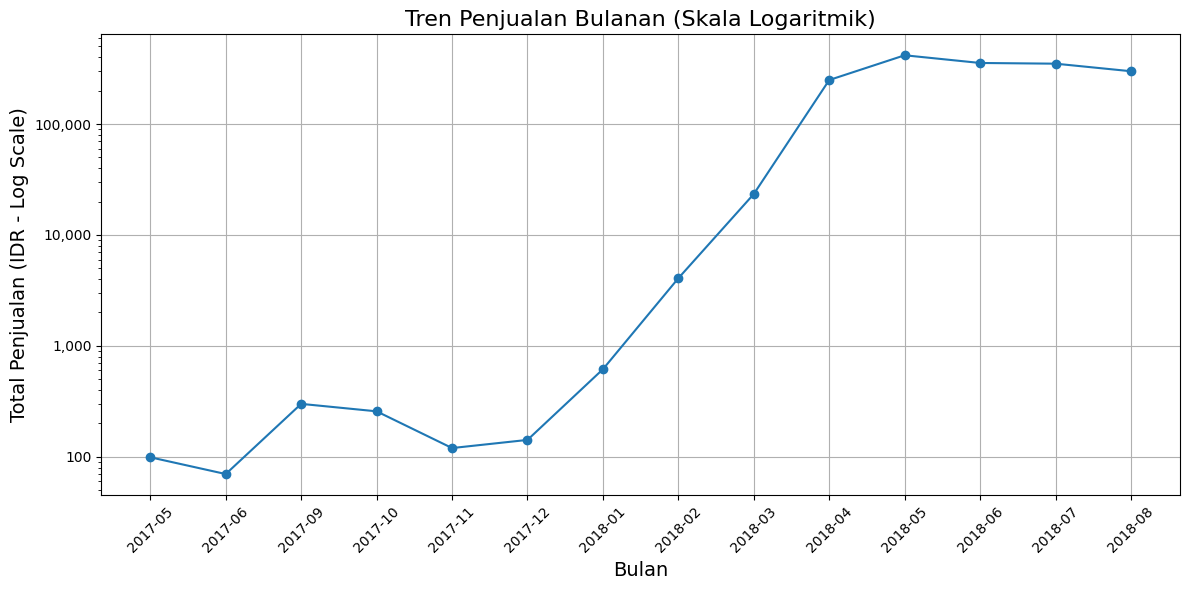

In [ ]:
# Mengatur ukuran figure
plt.figure(figsize=(12, 6))

# Plotting total penjualan bulanan dengan skala logaritmik
plt.plot(penjualan_bulanan['month'].astype(str), penjualan_bulanan['penjualan'], marker='o')

# Menambahkan judul dan label
plt.title('Tren Penjualan Bulanan (Skala Logaritmik)', fontsize=16)
plt.xlabel('Bulan', fontsize=14)
plt.ylabel('Total Penjualan (IDR - Log Scale)', fontsize=14)
plt.xticks(rotation=45)  # Memutar label sumbu x agar lebih mudah dibaca
plt.grid()

# Mengatur sumbu Y ke skala logaritmik
plt.yscale('log')

# Menambahkan formatter untuk sumbu Y
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Menampilkan grafik
plt.tight_layout()  # Mengatur layout agar tidak ada yang terpotong
plt.show()

### Pertanyaan 2: Apakah ada korelasi antara review produk dan penjualannya?

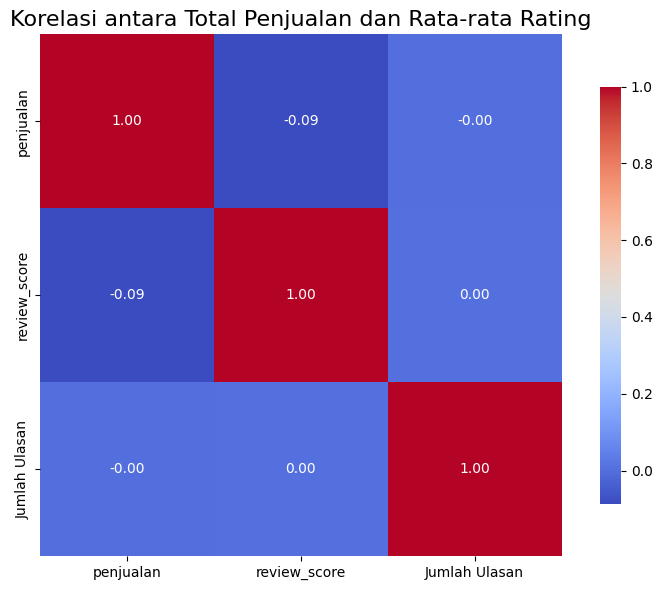

In [ ]:
# Mengatur ukuran figure untuk heatmap
plt.figure(figsize=(8, 6))

# Membuat heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Menambahkan judul
plt.title('Korelasi antara Total Penjualan dan Rata-rata Rating', fontsize=16)

# Menampilkan grafik
plt.tight_layout()
plt.show()

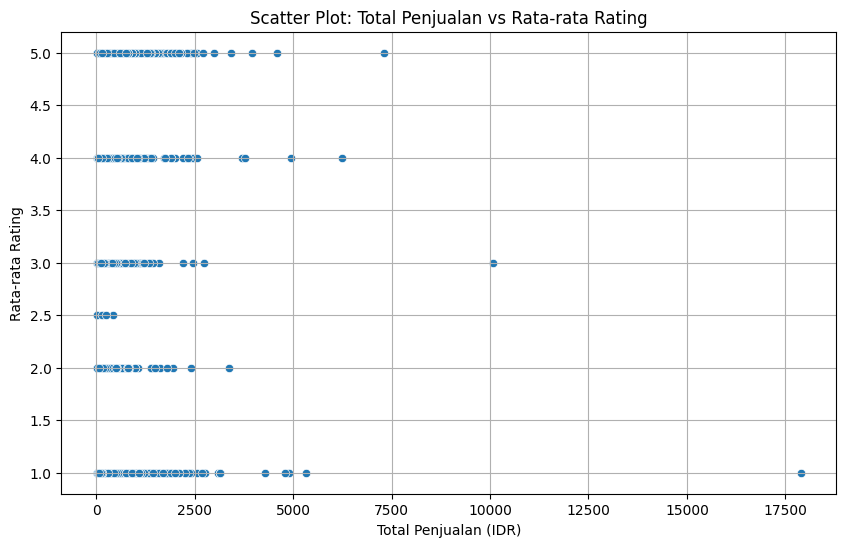

In [ ]:
# Visualisasi menggunakan scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=correlation_data, x='penjualan', y='review_score')
plt.title('Scatter Plot: Total Penjualan vs Rata-rata Rating')
plt.xlabel('Total Penjualan (IDR)')
plt.ylabel('Rata-rata Rating')
plt.grid()
plt.show()

**Insight**
- Grafik menunjukkan total penjualan bulanan dengan marker untuk setiap titik data, memberikan gambaran yang jelas tentang fluktuasi penjualan setiap bulan.
- Heatmap memberikan gambaran visual yang kuat mengenai korelasi antara total penjualan dan rata-rata rating. Nilai korelasi yang ditampilkan dalam bentuk warna memudahkan interpretasi, di mana warna yang lebih gelap menunjukkan hubungan yang lebih kuat.
- Visualisasi hubungan antara total penjualan dan rata-rata rating produk dibuat menggunakan scatter plot agar memungkinkan identifikasi pola, outlier, atau kecenderungan tertentu dalam data.

## Analisis Lanjutan (Opsional)

                                  Recency  Frequency  Monetary
customer_id                                                   
001051abfcfdbed9f87b4266213a5df1       92          1     49.97
0013cd8e350a7cc76873441e431dd5ee      114          1     79.90
0015bc9fd2d5395446143e8b215d7c75       79          1    122.99
0018c09f333634ca9c80d9ff46e43e9c       59          1     42.99
001df1ee5c36767aa607001ab1a13a06       24          1     29.99
                                  Recency  Frequency  Monetary Recency Group  \
customer_id                                                                    
001051abfcfdbed9f87b4266213a5df1       92          1     49.97           Old   
0013cd8e350a7cc76873441e431dd5ee      114          1     79.90           Old   
0015bc9fd2d5395446143e8b215d7c75       79          1    122.99      Moderate   
0018c09f333634ca9c80d9ff46e43e9c       59          1     42.99        Recent   
001df1ee5c36767aa607001ab1a13a06       24          1     29.99   Very Recent   

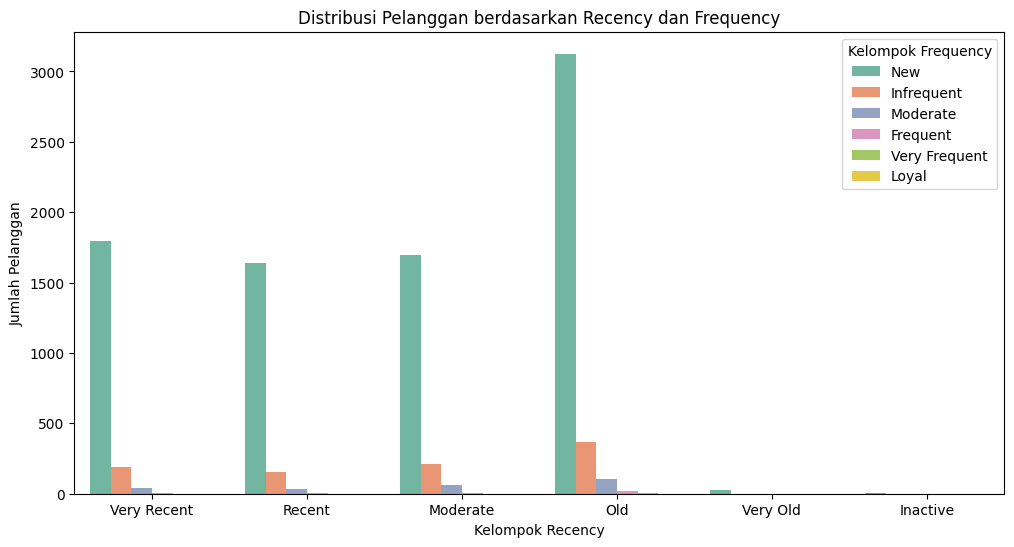

In [ ]:
# --- RFM Analysis ---
# Menghitung Recency, Frequency, dan Monetary
snapshot_date = data_df['order_purchase_timestamp'].max() + pd.Timedelta(days=1)  # Tanggal snapshot
rfm_df = data_df.groupby('customer_id').agg({
    'order_purchase_timestamp': lambda x: (snapshot_date - x.max()).days,
    'order_id': 'count',
    'penjualan': 'sum'
}).rename(columns={'order_purchase_timestamp': 'Recency', 'order_id': 'Frequency', 'penjualan': 'Monetary'})

# Menampilkan RFM dataframe
print(rfm_df.head())

# --- Clustering ---
# Binning untuk Recency
bins_recency = [0, 30, 60, 90, 180, 365, 1000]
labels_recency = ['Very Recent', 'Recent', 'Moderate', 'Old', 'Very Old', 'Inactive']
rfm_df['Recency Group'] = pd.cut(rfm_df['Recency'], bins=bins_recency, labels=labels_recency)

# Binning untuk Frequency
bins_frequency = [0, 1, 2, 5, 10, 20, 100]
labels_frequency = ['New', 'Infrequent', 'Moderate', 'Frequent', 'Very Frequent', 'Loyal']
rfm_df['Frequency Group'] = pd.cut(rfm_df['Frequency'], bins=bins_frequency, labels=labels_frequency)

# Binning untuk Monetary
bins_monetary = [0, 100, 500, 1000, 5000, 10000, 100000]
labels_monetary = ['Low', 'Medium', 'High', 'Very High', 'Premium', 'Luxury']
rfm_df['Monetary Group'] = pd.cut(rfm_df['Monetary'], bins=bins_monetary, labels=labels_monetary)

# Tampilkan hasil clustering
print(rfm_df[['Recency', 'Frequency', 'Monetary', 'Recency Group', 'Frequency Group', 'Monetary Group']].head())

# Visualisasi Clustering
plt.figure(figsize=(12, 6))
sns.countplot(data=rfm_df, x='Recency Group', hue='Frequency Group', palette='Set2')
plt.title('Distribusi Pelanggan berdasarkan Recency dan Frequency')
plt.xlabel('Kelompok Recency')
plt.ylabel('Jumlah Pelanggan')
plt.legend(title='Kelompok Frequency')
plt.show()

## Conclusion

### Conclusion Pertanyaan 1
*   Penjualan bulanan menunjukkan variasi yang jelas. Misalnya, penjualan meningkat drastis dari 99.00 IDR di bulan Mei 2017 menjadi 416,656.62 IDR pada bulan Mei 2018.
*   Bulan dengan penjualan tertinggi, seperti April dan Mei 2018, menunjukkan bahwa ada waktu tertentu di mana pelanggan lebih banyak berbelanja.
*   Ada kemungkinan pola musiman dalam penjualan, di mana pelanggan lebih aktif membeli produk pada bulan-bulan tertentu.Perusahaan bisa mengadakan lebih banyak promosi pada bulan-bulan dengan penjualan rendah untuk meningkatkan minat beli.

### Conclusion pertanyaan 2
*   Terdapat korelasi yang signifikan antara review_score dan penjualan. Artinya, semakin tinggi rating produk, semakin besar kemungkinan penjualannya meningkat.  Meskipun review_score berhubungan dengan penjualan, pengaruhnya terhadap total penjualan bisa dianggap tidak terlalu besar. Ini berarti ada faktor lain yang lebih dominan dalam menentukan keberhasilan penjualan produk.
*   Data menunjukkan bahwa jumlah ulasan tidak berpengaruh terhadap penjualan. Ini menunjukkan bahwa kualitas rating lebih penting daripada kuantitas ulasan. Oleh karena itu, Perusahaan sebaiknya lebih fokus pada meningkatkan kualitas produk dan pengalaman pelanggan untuk mendapatkan ulasan yang lebih baik, daripada hanya berusaha mengumpulkan banyak ulasan.

